# FrozenLake-v0

Solving [FrozenLake-v0](https://gym.openai.com/envs/FrozenLake-v0) using a simple implementation of Q-learning.

In [1]:
import gym
import numpy as np

### Loading the environment from gym

In [2]:
env = gym.make('FrozenLake-v0')

[2016-11-21 15:10:52,034] Making new env: FrozenLake-v0


In [13]:
class Agent(object):
    def __init__(self, action_space, observation_space):
        self.action_space = action_space
        self.observation_space = observation_space
        
        self.gamma = 0.9    # Discount factor
        self.l_r = 0.7      # Learning rate
        # self.epsilon = 1.0  # Probability of choosing a random action
        # self.epsilon_decay = 0.98 # Decay of epsilon per episode
        # self.epsilon_min = 0
        
        self.Q_Values = np.zeros((self.observation_space.n, self.action_space.n))
        
    def act(self, state, episode):
        # Choose an action greedily. We add random but decaying noise to the selection in order to explore actions.
        a = np.argmax(self.Q_Values[state,:] + np.random.randn(1,self.action_space.n)*(1./(episode+1)))
        '''if np.random.rand() > self.epsilon:
            print('exploit')
            a = np.argmax(self.Q_Values[state,:])
        else:
            print('explore')
            # explore: do something random
            a = self.action_space.sample()
        '''
        return a

    def update(self, previous_state, new_state, reward, action):
        self.Q_Values[previous_state,action] += self.l_r*(reward + self.gamma*np.max(self.Q_Values[new_state,:]) - self.Q_Values[previous_state,action])        
    
    '''def decay_epsilon(self):
        self.epsilon *= self.epsilon_decay
        self.epsilon = max(self.epsilon, self.epsilon_min) # cap at epsilon_min
    '''
            
    def get_Qvalues(self):
        return self.Q_Values

In [18]:
num_episodes = 2000
max_steps_per_episode = 100
hist_reward = []     # List to store the total reward collected per episode

# Create learning agent
agent = Agent(env.action_space, env.observation_space)

for episode in range(num_episodes):
    s = env.reset()  # Resets the environment and returns first observation (the state of the environment)
    cum_reward = 0   # Cumulative reward per episode

    for step in range(max_steps_per_episode):
        # Choose and action
        a = agent.act(s,episode)
        
        # Execute action and get new state and reward
        new_state, reward, done, _ = env.step(a)
        # Update agent
        agent.update(s, new_state, reward, a)
        cum_reward += reward
        s = new_state
        if done == True:
            # Decay exploration probability
            #agent.decay_epsilon()
            break
    
    hist_reward.append(cum_reward)
    if np.mean(hist_reward[-100:]) >= 0.78:
        print('Finish')
        print(episode)
        break
    
print(np.mean(hist_reward[-100:]))

print('Final Q-Table Values')
print(agent.get_Qvalues())

Finish
1819
0.78
Final Q-Table Values
[[  3.95482736e-02   1.75628494e-03   2.89784263e-03   1.64754761e-03]
 [  1.06723964e-01   1.52008930e-03   1.21345509e-03   1.24235503e-03]
 [  1.51974005e-03   3.39117786e-03   1.22331653e-03   3.92982668e-02]
 [  2.41155861e-03   3.50534800e-04   3.03159121e-04   1.87026113e-02]
 [  9.53957683e-02   8.52459166e-04   1.67970344e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  8.14636024e-02   8.08431649e-05   1.14538759e-05   4.28579764e-07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.54467818e-03   1.02972432e-02   2.23626996e-04   2.08916952e-01]
 [  0.00000000e+00   4.61353980e-01   0.00000000e+00   8.26456566e-04]
 [  8.07378558e-01   5.76753312e-04   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.97818895e-04   7

### Playing with the rewards

In the 'FrozenLake-v0' environment the agent receives a reward of 0 whenever he executes an action which does not lead to the goal. However, there is no difference between moving around the 'Lake' and falling into one of the 'holes'. Here, I will modify the reward function in order to get a small punishment (-0.05) whenever we fall.

In [16]:
num_episodes = 2000
max_steps_per_episode = 100
hist_reward = []     # List to store the total reward collected per episode

# Create learning agent
agent = Agent(env.action_space, env.observation_space)

for episode in range(num_episodes):
    s = env.reset()  # Resets the environment and returns first observation (the state of the environment)
    cum_reward = 0   # Cumulative reward per episode

    for step in range(max_steps_per_episode):
        # Choose and action
        a = agent.act(s,episode)
        
        # Execute action and get new state and reward
        new_state, reward, done, _ = env.step(a)
        
        # Modifying the reward
        if reward != 1.0 and done == True:
            reward = -0.05

        # Update agent
        agent.update(s, new_state, reward, a)
        cum_reward += reward
        s = new_state
        if done == True:
            # Decay exploration probability
            #agent.decay_epsilon()
            break
    
    hist_reward.append(cum_reward)
    if np.mean(hist_reward[-100:]) >= 0.78:
        print('Finish')
        print(episode)
        break
    
print(np.mean(hist_reward[-100:]))

print('Final Q-Table Values')
print(agent.get_Qvalues())

Finish
1972
0.7825
Final Q-Table Values
[[  1.03269174e-01   2.73869097e-03   2.46885457e-03   2.61483797e-03]
 [ -4.65323464e-02  -3.60587811e-02  -4.86599509e-02   8.80415070e-02]
 [ -2.30908807e-02  -2.76049032e-02  -3.55143667e-02   5.38075824e-02]
 [ -3.52835000e-02  -4.86500000e-02  -4.55000000e-02   2.91813427e-02]
 [  1.85126992e-01  -4.95950000e-02  -4.55023150e-02  -3.93662383e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -4.93644199e-02  -4.95979737e-02   1.02513117e-01  -4.99897544e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -3.53685500e-02  -4.55000000e-02  -4.55000000e-02   3.87247352e-01]
 [ -3.81500000e-02   3.98615049e-01  -3.50000000e-02  -4.55000000e-02]
 [  7.49873861e-01  -4.57835000e-02  -4.16599005e-02  -4.16134754e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [ -3.50000000e-02   0.00000000e+00  

# Q-learning with neural networks 

Implementing a very simple one-layer neural network to represent the Q values, thus replacing the lookup table.

In [3]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

### Implementing the network

In [4]:
# One-layer network
tf.reset_default_graph()
inputs = tf.placeholder(shape=[1,16],dtype=tf.float32)
W = tf.Variable(tf.random_uniform([16,4],0,0.01))
Q_out = tf.matmul(inputs,W)
prediction= tf.argmax(Q_out,1)

# Loss function
next_Q = tf.placeholder(shape=[1,4],dtype=tf.float32)
loss = tf.reduce_sum(tf.square(next_Q-Q_out))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

### Training the network

In [5]:
init = tf.initialize_all_variables()
gamma = 0.99        # Discount factor
epsilon = 0.1       # Exploration factor
num_episodes = 2000 # Number of episodes
max_steps_per_episode = 100

hist_reward = []    # List to store the total reward collected per episode
hist_num_steps = [] # List to store the number of steps per episode

with tf.Session() as sess:
    sess.run(init)
    for episode in range(num_episodes):
        # Resets environment and gets first observation
        state = env.reset()
        cum_reward = 0   # Cumulative reward per episode

        for step in range(max_steps_per_episode):
            # Choose an action greedily (WITH A CHANCE OF RANDOM)
            one_hot_state = np.identity(16)[state:state+1]  # one-hot representation of the states
            a, all_Q = sess.run([prediction,Q_out],feed_dict={inputs: one_hot_state})
            if np.random.rand(1) < epsilon:
                # Explore
                a[0] = env.action_space.sample()
            new_state, reward, done, _ = env.step(a[0])
            
            # Obtain Q' values for the new state
            Q1 = sess.run(Q_out, feed_dict={inputs:np.identity(16)[new_state:new_state+1]})
            # Obtain maxQ
            maxQ1 = np.max(Q1)
            # Set target value for chosen action
            target_Q = all_Q
            target_Q[0,a[0]] = reward + gamma*maxQ1
            
            # Train the network using the target Q
            _, W1 = sess.run([optimizer,W],feed_dict={inputs:np.identity(16)[state:state+1],next_Q:target_Q})
            
            cum_reward+=reward
            state = new_state
            if done==True:
                break
        hist_num_steps.append(step)
        hist_reward.append(cum_reward)
        
print(np.mean(hist_reward[-100:]))

0.41


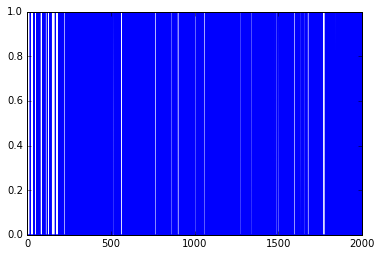

In [6]:
plt.plot(hist_reward)

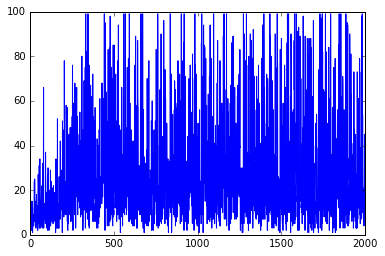

In [7]:
plt.plot(hist_num_steps)